# Исследование закономерностей, определяющие успешность игр.

**Для исследования представлены данные открытых источников:**  
- доступны исторические данные о продажах игр, 
- оценки пользователей и экспертов, 
- жанры, 
- платформы (например, Xbox или PlayStation) 

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель проекта и основные гипотезы:**

Для определение максимально популярного продукта и планирования рекламной кампании на будущий год, необходимо выявить основные закономерности успешности игр.  

Для этого проверим 2 основные гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров "Action" и "Sports" разные.

**Основные пункты выполнения проекта:** 

1) Получить и отобразить первичные данные из файла `games.csv`  
2) Подгодовка полученных данных, для дальнейшего анализа основных регионов, игровых платформ и жанров игр  
3) Провести исследовательский анализ данных из полученного датасета выявления потенциально популярных игровых платформ и жанров игр.  
4) Формирование портрета пользователей в разрезе регионов, сравнения топ 5 платформ и жанров каждого региона   
5) Проверка основнх гипотез проекта  
6) С формулировать общий вывод  

### Подключим необходимые библиотеки и получим первичные данные.

#### Подключим необходимые библиотеки

In [3]:
#для работы с табличными даными
import pandas as pd
#для математических операций
import numpy as np
#для работы с графиками
import seaborn as sns
#для более глуокой работы с графиками
import matplotlib.pyplot as plt
#библиотека для графиков с пропусками missingno
!pip install missingno
import missingno as msno

#для проверки гипотез
from scipy import stats as st
#для корректного отображения через display
from IPython.display import display

#### Настроим отображения в ячейках

In [4]:
#избавимся от записи чисел с плавающей точкой
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# отобразить все столбцы
pd.set_option('display.max_columns', 100) 

#### Получим первичную информацию о данных из `games.csv`

In [5]:
df = pd.read_csv('/datasets/games.csv')
display(df.head())
display(df.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

 В датасете 16715 строк и 11 колонок.
 
 5 колонок формата object  
 6 колонок формата float64
 
 Обнаружены следующие проблемы:
 - в названиях столбцов присуствтуют буквы в верхнем регистре
 - в столбце `Year_of_Release` необходимо поменять тип данных на `int`
 - в столбце `User_Score` необходимо поменять тип данных на `float`
 - в столбце `Critic_Score`, необходимо поменять тип данных на `int`
 - в столбцах `Year_of_Release`, `Critic_Score`, `User_Score`, `Rating`, `name`, `genre` присутвуют пустые значения

Создадим словарь с основными названиями графиков и гистограмм

In [6]:
#Словарь с названиями графиков
name_dict ={
    'number_score' : 'количество оценок',
    'number_games' : 'количество игр',
    'genre_sales' : 'объемы продаж игр по жанрам',
    'genre_sales_filter' : 'объемы продаж игр по жанрам с фильтром',
    'score_critics_hist_na' : 'рапределение оценок критиков(с пропусками)',
    'score_users_hist_na' : 'рапределение оценок пользователей(с пропусками)',
    'value_sales_game_all_platform' : 'объем продаж игр на всех платформах',
    'heatmap_sales_platforms' : 'тепловая карта продаж игр на разных платформах',
    'best_platform' : 'лучшие платформы',
    'best_platform_filter' : 'лучшие платформы с фильтром',
    'user_score' : 'пользовательская оценка',
    'critic_score' : 'оценка критиков',
    'number_of_game_year': 'количество игр по годам',
    'value_sales_game_actual_platform' : 'объем продаж игр на актуальных платформах',   
    'value_sales' : 'объем продаж',
    'share_value_sales_region' :'Доля региона в общем объеме продаж',
    'user_score_PC_XOne' : 'Пользовательские оценки на платформах PC и XOne',
    'user_score_action_sports' : 'Пользовательские оценки в жанрах Action и Sports',
    'share_top_5_platform' : 'Распределение топ 5 платформ по регионам',
    'share_top_5_genre' : 'Распределение топ 5 игровых жанров по регионам',
    'share_top_rating' : 'Распределение продаж по рейтингу в разрезе регионов',
    'share_number_genre' : 'Доля объемов продаж и количества в разрезе регионов'
}

### Подготовка данных

#### Изменим на название столбцов и значений категориальных переменных на формат `snake_case` 

In [7]:
#изменение название колонок в нижний регистр
df.rename(columns={name: name.lower() for name in df.columns}, inplace=True)

#изменение категориальных значение в нижний регистр
for col in ['name', 'platform', 'genre', 'rating']:
    df[col] = df[col].str.lower()

display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.00,sports,41.36,28.96,3.77,8.45,76.00,8,e
1,super mario bros.,nes,1985.00,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.00,racing,15.68,12.76,3.79,3.29,82.00,8.3,e
3,wii sports resort,wii,2009.00,sports,15.61,10.93,3.28,2.95,80.00,8,e
4,pokemon red/pokemon blue,gb,1996.00,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Оценим общее состояние пропусков в датафрейме

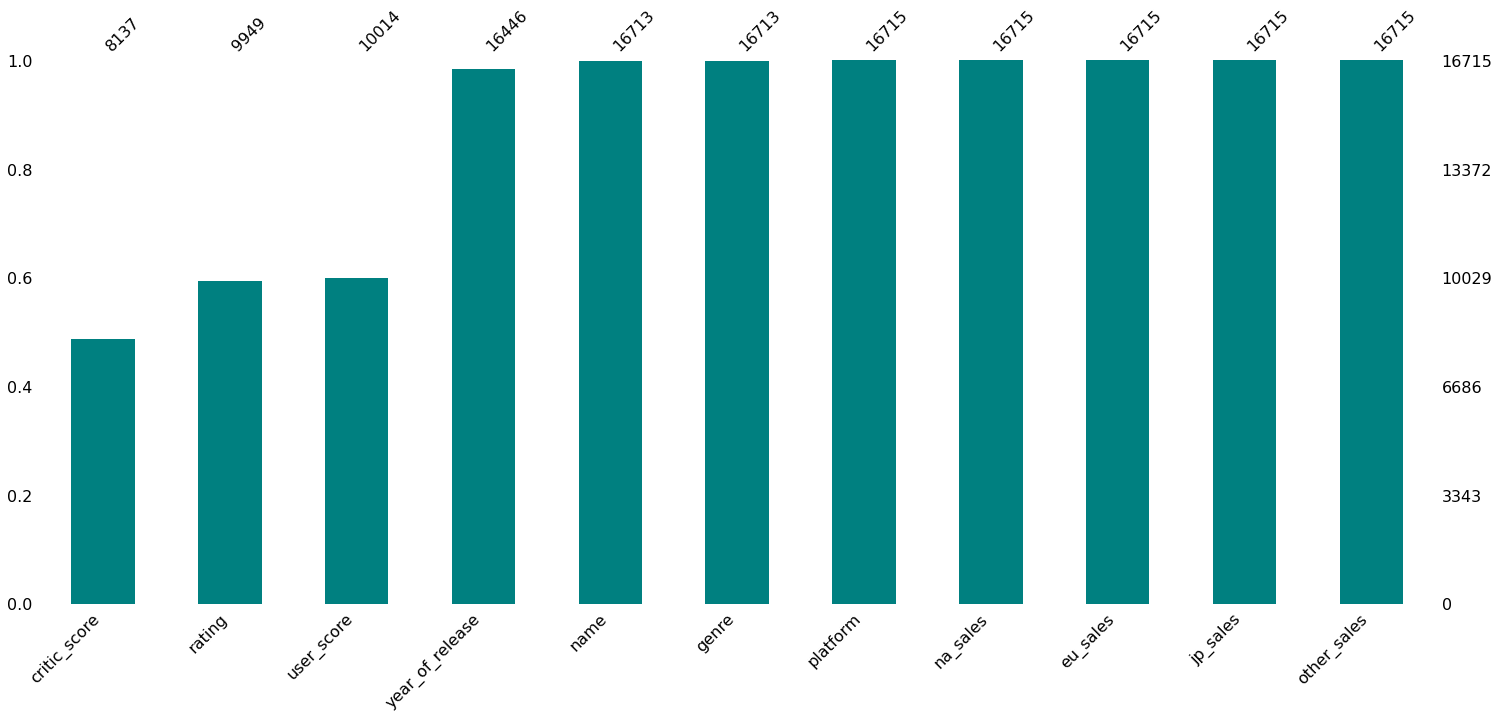

In [8]:
msno.bar(df, sort='ascending', color='teal')
plt.show;

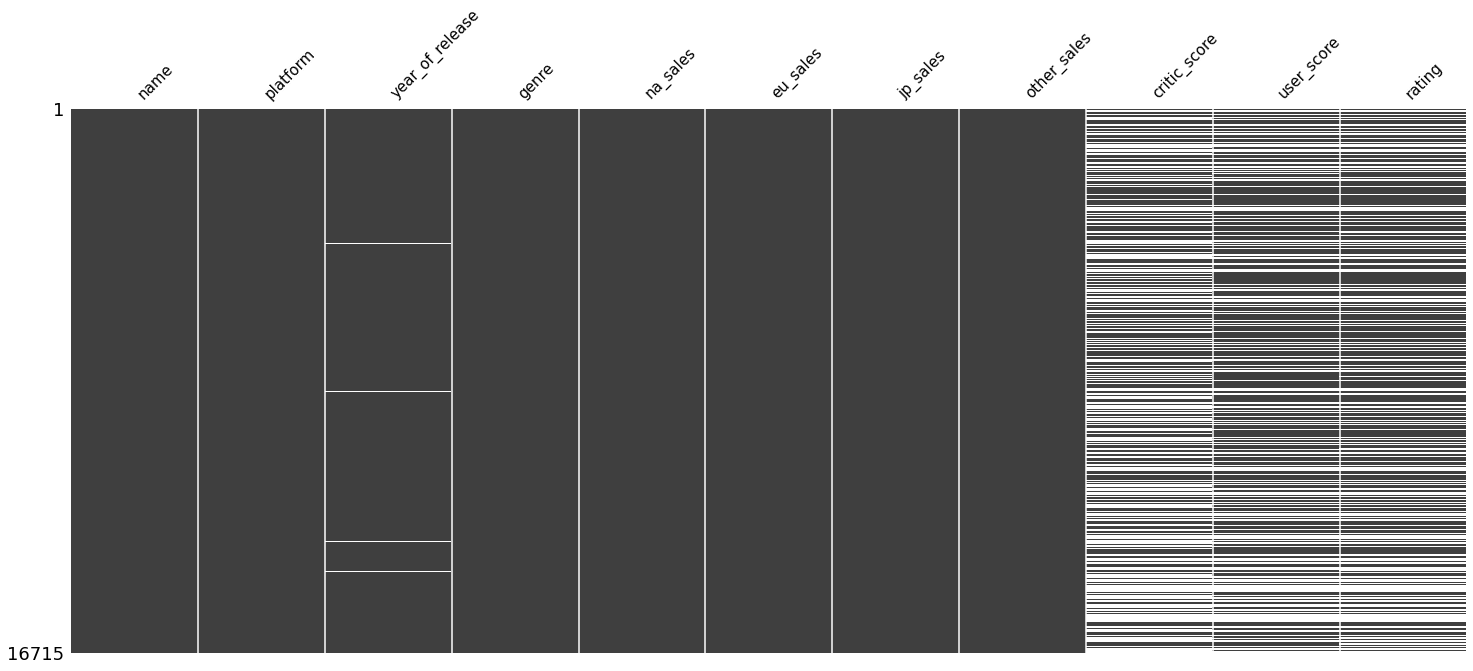

In [9]:
#Отобразим структуру пропусков 
msno.matrix(df, fontsize=15, sparkline=False);

Структура пропусков данных показывает, что основной объем пропуска приходится на столбцы с оценками и рейтингом. Возможно они образовались в результате объеденения данных, возможно не вносились пользователями или не имеют оценки. Данные с оценками и рейтингом необходимы для анализа, поэтому необходимо их отработать и получить максимально актуальные данные.

В столбце `year_of_release` всего 269 строк с пропусками, необходимо проверить наличие года игры в названии и так же проверить есть ли дата релиза в возможных дубликатах

В столбце `user_score`и `rating` остутствует около 40% информации по играм, и в столбце `critic_score` остутствует около 50% информации по играм, необходимо определить оптимальный вариант заполнения пропусков. и наличия инфомации в аналогичных играх.  

#### Изменим тип данных в определенных столбцах

В типе данных `year_of_release`, год хранится в типе `float`, надо поменять в тип `int`, т.к. обозначение года подразумевает целые цифры.

In [10]:
df['year_of_release'] = df['year_of_release'].astype('Int32')
print(f'Тип данных в столбце year_of_release - {df["year_of_release"].dtype}')

Тип данных в столбце year_of_release - Int32


В типе данных `critic_score` все цифры целые, можно предположить что оценки целые числа, поэтому лучше перевести цифры в тип `int`, переведем далее по коду, после завершения всех процедур со столбцом `critic_score`.

In [11]:
print('Доля значений с показателем tbd в столбце user_score -', 
      round(df.loc[df['user_score'] == 'tbd'].shape[0] / df.shape[0], 2))

Доля значений с показателем tbd в столбце user_score - 0.15


В типе данных `user_score` в основном цифры типа `float`, оценки от пользователей их необходимо перевести в тип float. В значениях присутвует абревеатура `tbd`, то расшифровывается как `To Be Determined` (перевод - будет определено), и означает, что значение отсуствует, скорее всего по причине того, что оценки еще не выставлены пользователями, либо образовались в процессе соеденения данных. Удалять строки с долей 15% из важного для анализа столбца не целесообразно, заменим на `nan`, для дальнейшего корректного заполнения пропусков. 

In [12]:
#замения tbd на nan
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
#изменим тип
df['user_score'] = df['user_score'].astype('float32')
print(f"Тип значений столбца user_score: {df['user_score'].dtypes}")

Тип значений столбца user_score: float32


#### Проверим датафрейм на наличие дубликатов

In [13]:
#Поиск явных дубликатов
print(f'Дубликатов в df - {df.duplicated().sum()}')

Дубликатов в df - 0


In [14]:
df['name'] = df['name'].astype('str')
print(f"Количество строк в столбце name - {len(df['name'])}")
print(f"Количество уникальных значений в столбце name - {len(df['name'].unique())}")

Количество строк в столбце name - 16715
Количество уникальных значений в столбце name - 11560


In [15]:
display(df.loc[df['name'].duplicated() == True].sample(3))
display(df.query('name == "final fantasy crystal chronicles: echoes of time"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6677,nba showtime: nba on nbc,n64,1999,sports,0.23,0.02,0.00,0.00,NaN,NaN,NaN
13053,to heart 2: dungeon travelers,psv,2015,adventure,0.00,0.00,0.05,0.00,NaN,NaN,NaN
15974,syberia ii,pc,2004,adventure,0.00,0.01,0.00,0.00,80.00,8.30,t


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4196,final fantasy crystal chronicles: echoes of time,ds,2009,role-playing,0.12,0.06,0.27,0.02,75.00,7.30,e10+
6623,final fantasy crystal chronicles: echoes of time,wii,2009,role-playing,0.13,0.06,0.05,0.02,64.00,5.60,e10+


Данные повторения это релиза игр на разных платформах, учтем для анализа, менять ничего не будем.

#### Заполним пропуски данных в столбцах 
В столбцах `genre` и `name` 2 одинаковые строки с пустыми значениями, удалим их т.к. востановить данные не представляется возможным

In [16]:
df= df.dropna(subset=['genre'])
print('Строк с пустыми значениями в столбце genre -', df['genre'].isna().sum())

Строк с пустыми значениями в столбце genre - 0


В столбце `year_of_release` в датафрейме несколько названий игр представленные на разных платформах, в некоторых присутствуют пустые значения, заменим пустые значение на значения одинаковых названий, возьмем максимальную дату при наличии разных дат.

In [17]:
# жизненный срок платформы

years_of_life = df.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

# years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
2600,1980,1989,9
3do,1994,1995,1
3ds,2011,2016,5
dc,1998,2008,10
ds,1985,2013,28
gb,1988,2001,13
gba,2000,2007,7
gc,2001,2007,6
gen,1990,1994,4


In [18]:
print(f"Пустых значений в столбце year_of_release: {len(df.query('year_of_release.isna()'))}")

Пустых значений в столбце year_of_release: 269


Проверим с нулевыми значениями столбца year_of_release и доля от общего объема дата фрейма

In [19]:
display(df.query('year_of_release.isna()').groupby('platform')['name'].count())

platform
2600    17
3ds      8
ds      30
gb       1
gba     11
gc      14
n64      3
pc      17
ps       7
ps2     34
ps3     25
psp     16
psv      1
wii     34
x360    30
xb      21
Name: name, dtype: int64

Т.к. доля пропусков в столбце `year_of_release` в общем объеме датафрейма, не значительная, и игры представленны в основном на устарвших платформах, удалим пропуски.  

Удалим пустые значения в столбце year_of_release, т.к. актуальную дату релиза востановить не возможно.

In [21]:
df = df.dropna(subset=['year_of_release'])
print(f"Пустых значений в столбце year_of_release: {df['year_of_release'].isna().sum()}")

Пустых значений в столбце year_of_release: 0


Пустые строки в столбце `critic_score` и `user_score` будем заменять по среднему значению оценки, по идентичным названиям игр, т.к. наибольшая вероятность получить актуальную оценку это **сравнить оценки этой же игры на других платформах**. Оставшиеся пустые значения, где не сможем получить оценку, заполним медианным значениям по **жанру игры**, это так же даст более актуальную оценку, чем медианное значение оценок всей выборки.

In [22]:
%%time
#Заполнение средней по оценкам на других платформах
df.loc[df['critic_score'].isna(), 'critic_score'] = (df.
                                                     loc[df['critic_score'].isna(), 'name']
                                                     .apply(lambda x: df.loc[df['name'] == x, 'critic_score'].mean()))

print(f"Пустых значений в столбце critic_score: {df['critic_score'].isna().sum()}")

Пустых значений в столбце critic_score: 7522
CPU times: user 11.1 s, sys: 52.1 ms, total: 11.1 s
Wall time: 11.1 s


In [23]:
#Заполнение медианной по идентичному жанру
df['critic_score'] = round(
    df['critic_score'].fillna(df.groupby('genre')['critic_score'].transform('median'))
).astype('int32')

print(f"Тип значений: {df['critic_score'].dtype}")
print(f"Пустых значений в столбце critic_score: {df['critic_score'].isna().sum()}")

Тип значений: int32
Пустых значений в столбце critic_score: 0


In [24]:
print(f"Пустых значений в столбце user_score: {df['user_score'].isna().sum()}")

Пустых значений в столбце user_score: 8981


In [25]:
%%time
#Заполнение средней по оценкам на других платформах
df.loc[df['user_score'].isna(), 'user_score'] = (df
                                                 .loc[df['user_score'].isna(), 'name']
                                                 .apply(lambda x: df.loc[df['name'] == x, 'user_score'].mean()))

print(f"Пустых значений в столбце user_score: {df['user_score'].isna().sum()}")

Пустых значений в столбце user_score: 7920
CPU times: user 11.7 s, sys: 45.2 ms, total: 11.7 s
Wall time: 11.7 s


In [26]:
#Заполнение медианной по идентичному жанру
df['user_score'] = df['user_score'].fillna(df.groupby('genre')['user_score'].transform('median')).round(2)
print(f"Пустых значений в столбце user_score: {df['user_score'].isna().sum()}")

Пустых значений в столбце user_score: 0


В столбце `rating` категориальная переменная со значениями ретинга *Entertainment Software Rating Board (ESRB)*, действующие оценки рейтинга согласно *wikipedia*:  
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- «RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»

In [27]:
print(f"Уникальные значения rating: {df['rating'].unique()}")

Уникальные значения rating: ['e' nan 'm' 't' 'e10+' 'k-a' 'ao' 'ec' 'rp']


В столбце `rating` большое количество пропусков (около 40%), которые скорее всего образовались в результате отсутствия рейтинговой оценки данной игры, либо образовались в результате объеденения таблиц, получить актуальную информацию не представляется возможным, заменим пропуски  на значение `I-R` (*Indeterminate Rating*), 
Так же присутвует рейтинг `K-A` (*Kids to Adults*), относится к категории `E`, заменим соответственно. Несколько строк со значением `RP`, `EC`, `AO` удалим т.к. они не значительные

In [28]:
#Замена значение K-A
df.loc[df['rating'] == "k-a", 'rating'] = 'e'
#Замена удаление значение RP
df = df.drop(df.query('rating == ["rp","ec", "ao"]').index)
#Замена пустых значений на I-R
df['rating'] = df['rating'].fillna('i-r')
print(f"Пустых значений в столбце rating: {len(df.query('rating.isna()'))}")

Пустых значений в столбце rating: 0


#### Добавим столбец total_sales, с сумарными продажами игр

In [29]:
#Сумируем продажи в регионах и записываем в столбец
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(df.head() )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.00,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,69,7.60,i-r,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.30,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.00,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,74,7.90,i-r,31.38


### Исследовательский анализ данных

#### Проверим сколько игр выпускалось в разрезе годов

In [30]:
#функция построения barplot
def create_barplot(data: pd.Series, name: str, rot: int, width: int, height: int, y: str)->None:    
    plt.figure(figsize=(width, height))
    sns.barplot(x = data.index, y = data.values).set(ylabel=y)    
    plt.title(name)
    plt.xticks(rotation=rot)
    plt.show()

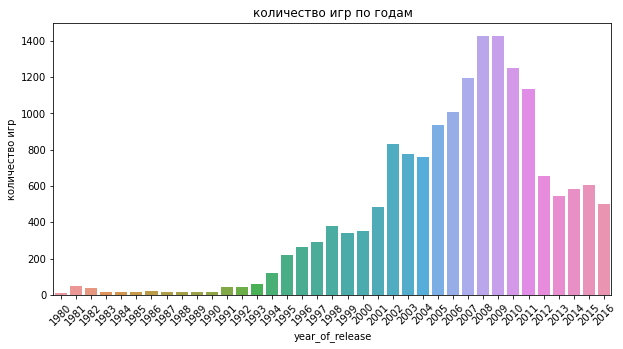

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
name,9,46,36,17,14,14,21,16,15,17,16,41,43,60,121,219,263,289,379,338,350,482,829,775,762,936,1006,1197,1427,1425,1251,1134,653,544,581,606,502


In [31]:
#График распределения по годам
create_barplot(df.groupby('year_of_release')['name'].count(),
               name=name_dict.get('number_of_game_year'), 
               rot=45, 
               width=10, 
               height=5,
               y=name_dict.get('number_games'))

#таблица с данными
display(df.pivot_table(columns='year_of_release', values='name', aggfunc='count'))

Распределение игр по годам имеет выраженую тенденцию к росту числа игр практически каждый год до пика 2008 года - 1440 игр, после этого постепенное происходит снижение релизов новых игр до уровня 500 - 600 игр в период 2012 - 2016 г.г. Основной объем игр был выпущен в период с 2000 года по 2016 год, с серединой пика в 2008 году.

#### Проверим как менялись продажи игр в разрезе платформ 
Для начала рассмотрим общую картину продаж всех игр за весь период текущей выборки

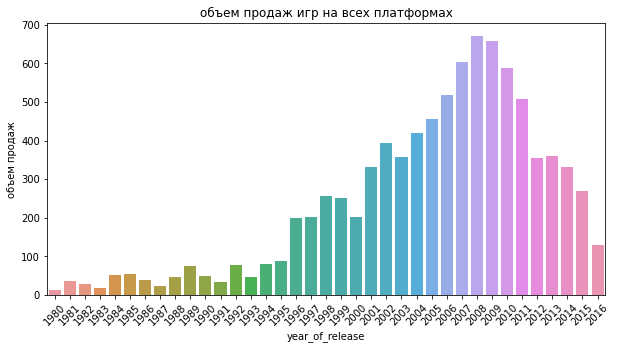

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
total_sales,11.38,35.68,28.88,16.80,50.35,53.95,37.08,21.70,47.21,73.45,49.37,32.23,76.16,45.99,79.23,88.12,199.15,201.07,256.31,251.11,201.66,331.46,394.97,357.54,418.68,455.51,517.71,604.75,671.50,658.62,589.38,507.09,355.84,361.24,331.53,267.98,129.94


In [32]:
#График распределения по годам
create_barplot(data=df.groupby('year_of_release')['total_sales'].sum(), 
               name=name_dict.get('value_sales_game_all_platform'), 
               rot=45, 
               width=10, 
               height=5,
               y=name_dict.get('value_sales'))
#таблица с данными
display(df.pivot_table(columns='year_of_release', values='total_sales', aggfunc='sum'))

Объемы продаж игр на всех платформах по годам повторяют рапределения релизов игр в разрезе годов (см. выше). Пик продаж приходится на 2008 год, с динамикой роста с 1980 до 2008 года и снижения с 2008 года по  2016 год, со смещением в сторону 2016 года.

In [33]:
print(f"Расмотрим какие платформы в датасете:\n\n{df['platform'].unique()}")

Расмотрим какие платформы в датасете:

['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']


platform,2600,3do,3ds,dc,ds,gb,gba,gc,gen,gg,n64,nes,ng,pc,pcfx,ps,ps2,ps3,ps4,psp,psv,sat,scd,snes,tg16,wii,wiiu,ws,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,53.44,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,0.00,45.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


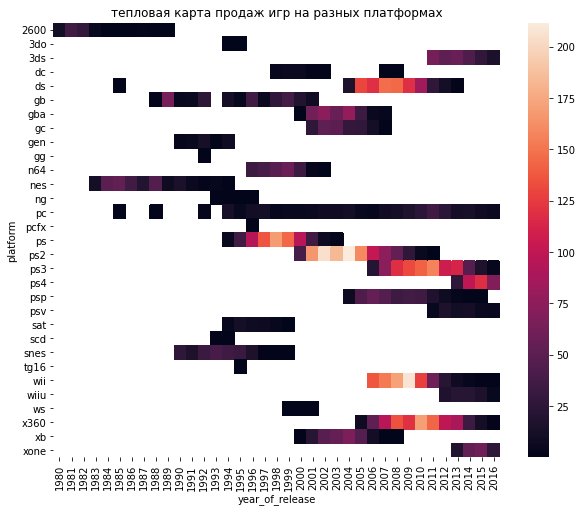

In [34]:
#таблицы распределения продаж игр
display(df
        .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
        .fillna(0.0)
)

#heatmap распределения по годам
plt.figure(figsize=(10, 8))
sns.heatmap(df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum'))
plt.title(name_dict.get('heatmap_sales_platforms'))
plt.show()

- до 90-х годов основыне продажи приходились на `2600`, `NES`, 
- с 90-ых до 2000-х появляется больше платформ такие как `SNES, SAT, SCD, PS, PC, NG, N64,GEN, GB, 3DO` на этих площадках основные продажи, а площадки популярные до 90-х, потихоньку исчезают или уже исчезли с рынка. Надо отметить продажи `PS` в эти годы, до `160-170 млн.`, 
- с 2000-х до 2010-х основные продажи пришлись на `XB, X360, Wii,PSP, PS2, PS3, PC, N64, GC, GBA, DC,` Основные продажи пришлись на платформы `X360, Wii, PS3, PSP и XB`, на которые в целом пришлись самые большие продажи.
- после 2010 - х, основные продажи пришлись на `XOne, X360, PSV, PSP, PS4, PS3, PC, DS, 3DS`, платформы `PS4 , PS3, XOne и X360` продолжают показывать самые высокие продажи, но после 2010 - х  очевидна тенденция уменьшения продаж к прошлой десятилетки.

In [35]:
#Удалим выброс 1985 года по платформе DS
df.drop(df.query('platform == "ds" and year_of_release == 1985').index, inplace=True)
#создадим выборку по среднему сроку платформ 
avarge_period = df.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
).notna().agg('sum')

#Удалим значение PC т.к.по факту не является игровой приставкой
#Удалим занчение молодых платформ срок продаж, которые появились после 2012 года и существуют еще слишком мало времени
avarge_period.drop(labels=['pc', 'wiiu', 'xone', 'ps4', '3ds', 'psp'], inplace=True)

print(f"Средний срок существования платформ: {round(avarge_period.mean())} лет", '\n')

#Cрок существования платформ
print(avarge_period.sort_values(ascending=False).head(15))

Средний срок существования платформ: 7 лет 

platform
gb      13
nes     12
x360    12
ps2     12
wii     11
ps3     11
2600    10
ds      10
snes    10
ps      10
xb       9
gba      8
n64      7
gc       7
dc       7
dtype: int64


Средний срок существования платформ согласно данным выборки `7 лет`, в среднем в течении этого периода основная масса платформ прекращают свое существоания, Однако необхоимо обратить внимание на то, что в последнии годы срок жизни платформ появившиеся во второй половине выбранных дат, увеличвается относительно тех платформ которые появились в первой половине. Так же необходимо отметить, что некоторые успешные платформы имеют более продвинуые версии к примеру `PS, PS2, PS3` или `XB, X360, XOne` и т.п. 

#### Выберем из текущего датасета `df`, актуальные для анализа данные.     

Исходя из проанализированных выше данных, согласно графика распределения продаж данные `с 2000 по 2016 год` являются самыми объемными с точки зрения продаж, `8 лет` до максимально значения выпущенных игр `2008 год` и `8 лет после`.  

Так же анализ жизнедеятельности платформ показал средний срок существования `7 лет`, и учитывая тот факт что многие платформы в начале и к концу своего существования показывают значительное сниженые объемы продаж, а так же с целью исключения отживающие тренды на сниженных объемах в конце срока существования платформ, оптимальными для анализа будет период **последнии 3 года с 2013 по 2016 год** включительно.

In [36]:
#датафрейм из актуальных для анализа данных
df_actual = df.query('year_of_release > 2012')
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   int32  
 9   user_score       2233 non-null   float32
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int32(1), float32(1), float64(5), int32(1), object(4)
memory usage: 202.8+ KB


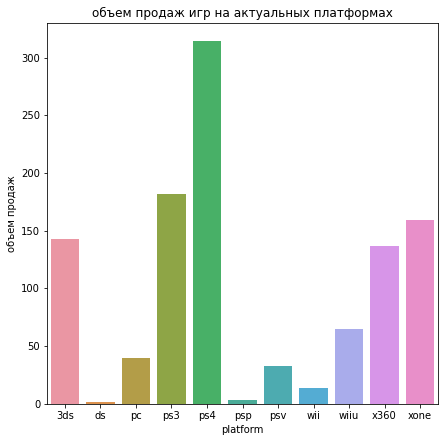

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
total_sales,143.25,1.54,39.43,181.43,314.14,3.50,32.99,13.66,64.63,136.80,159.32


In [37]:
#График распределения по годам
create_barplot(data=df_actual.groupby('platform')['total_sales'].sum(), 
               name=name_dict.get('value_sales_game_actual_platform'), 
               rot=0, 
               width=7, 
               height=7,
               y=name_dict.get('value_sales'))
#таблица с данными
display(df_actual.pivot_table(columns='platform', values='total_sales', aggfunc='sum'))

Для дальнейшего анализа выберем актуальные и самые большие по объему продаж платформы:
- 3DS - падающий тренд
- PS3 - падающий тренд
- PS4 - растущий тренд
- XOne - растущий тренд
- X360 - падающий тренд

In [38]:
def create_boxplot(data: pd.DataFrame, x: str, y: str, title_name: str, rot: int=0, ylim: int=0)-> None:
    plt.figure(figsize=(7, 7))
    sns.boxplot(data=data, x=x, y=y).set(title=title_name)
    plt.xticks(rotation=rot)
    if ylim > 0:
        plt.ylim(0, ylim)
    plt.show()

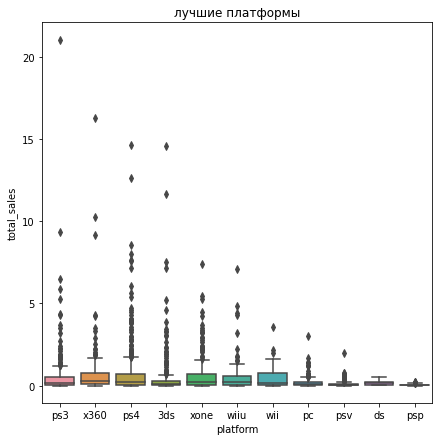

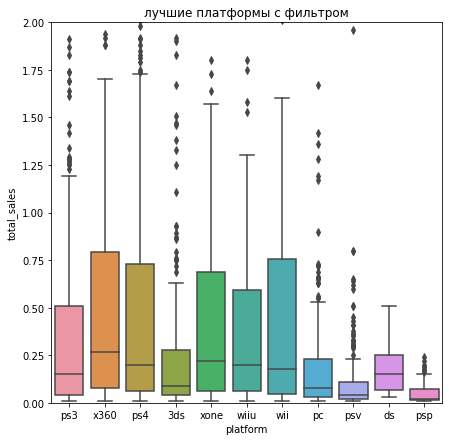

In [39]:
#отрисуем распределение общих продаж игр в разрезе площадок
create_boxplot(data=df_actual, 
               x='platform', 
               y='total_sales', 
               title_name=name_dict.get('best_platform'))

#т.к в данных присутвует большое количество выбросов с большим размахом в сторону больших продаж, "увеличим" маштаб
create_boxplot(df_actual, 
               'platform', 
               'total_sales', 
               name_dict.get('best_platform_filter'),
               ylim=2)

У всех площадок имеются большое количество выбросов, серьезно отличающеся по объемам продаж от основного количества продаж игр. Особенно отличительные выбросы на площадках лидерах по объемам продаж `PS3`, `PS4`, `XOne`, `XBox`, `3DS`. Большое количество выбросов говорит о наличии игр резко отличающиеся от других объемами продаж, поэтому мы исключаем их из визуализации некоторых графиков, но не исключаем из датафрейма, т.к. эти данные так же важны для дальнейшего анализа.

Сразу можно выделить PS3б PS4 и X360, XOne продажи игр на этих отличаются от остальных более высоким медианными значениями и межквартильным размахом увеличеный в сторону больших объемов продаж конкретных игр. 

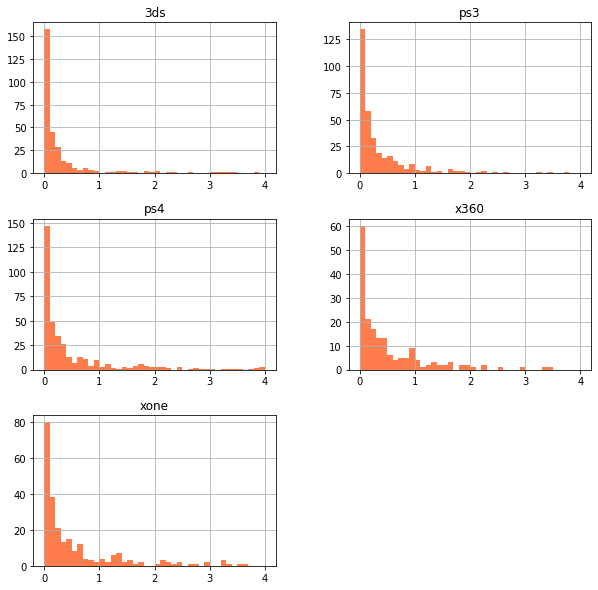

In [40]:
#Визуализируем гистограммы распределения продаж
(df_actual[['name', 'platform', 'total_sales']]
 .query('platform in ["3ds", "ps3", "ps4", "x360", "xone"]')
 .pivot_table(index='name', columns='platform', values='total_sales')
).hist(bins=40, range=(0, 4), figsize=(10, 10), alpha=0.7, color='orangered');

In [41]:
#основные статистические показатели для популярных платформ
(df_actual[['name', 'platform', 'total_sales']]
 .query('platform in ["3ds", "ps3", "ps4", "x360", "xone"]')
 .pivot_table(index='name', columns='platform', values='total_sales')).describe()

platform,3ds,ps3,ps4,x360,xone
count,303.00,345.00,392.00,186.00,247.00
mean,0.47,0.53,0.80,0.74,0.65
std,1.38,1.45,1.61,1.66,1.04
min,0.01,0.01,0.01,0.01,0.01
25%,0.04,0.04,0.06,0.08,0.06
50%,0.09,0.15,0.20,0.27,0.22
75%,0.28,0.51,0.73,0.80,0.69
max,14.60,21.05,14.63,16.27,7.39


Визуализация данных по продажам игр в разрезе платформ рапределена характерным для рапределения Пуасона характеристиками с резким сокращением количества игр с большими объемами продаж и подтверждает, характер распределения основного количества игр в районе `0.05 до 0.78` млн и длинным "хвостом" в сторону увеличения объемов продаж небольшого количества конкретных игр.

На платформе `X360` в среднем самые большие продажи игр, и самое высокое медианное значение - `0.27 млн.`, далее не на много отстает `XOne - 0.22 млн`, `PS4 - 0.20 млн.`.

#### Анализ влияния отывов пользователей и критиков на объемы продаж на одной из самых популярной платформы X360, с точки зрения продаж.

Для оценки силы связи между переменными будем использовать `Шкалу Чеддока`:

Коэффициент корреляции  | Интерпретация 
------- | --------
 от 0 до 0,3     | очень слабая
 от 0,3 до 0,5   | слабая
 от 0, 5 до 0,7  | средняя
 от 0,7 до 0, 9  | высокая
 от 0,9 до 1     | очень высокая

В данном анализе будет не корректно исключать игры с более высокими объемами продаж, т.к. их влияние на общий объем продаж значительное, поэтому при расчетах будем использовать все данные.

In [42]:
def scater_helper(data: pd.DataFrame, x: str, y: str, title_name: str, color: str)-> None:
    data.plot(x=x,
              y=y, 
              kind='scatter',
              title=title_name, 
              grid=True, 
              color=color, 
              alpha=0.5)
    plt.show()
    
#функция для отрисовки графиков и коэфициента кор
def score_corr(platform: str) -> None:
    
    data = df_actual.query('platform == @platform')
    
    scater_helper(data, 'total_sales', 'user_score', f"{name_dict.get('user_score')} {platform}", 'purple')  

    scater_helper(data, 'total_sales', 'critic_score', f"{name_dict.get('critic_score')} {platform}", 'green')

    plt.show()
    
    print(f"Таблица корреляции данных critic_score, user_score и total_sales:\n\n\
    {(data.filter(items=['name', 'platform', 'critic_score', 'user_score', 'total_sales']).corr())}")
    

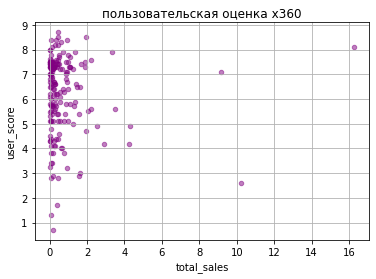

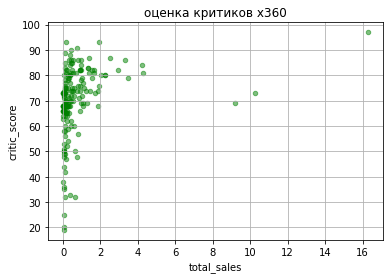

Таблица корреляции данных critic_score, user_score и total_sales:

                  critic_score  user_score  total_sales
critic_score          1.00        0.25         0.27
user_score            0.25        1.00        -0.03
total_sales           0.27       -0.03         1.00


In [43]:
score_corr('x360')

Сильной зависимости объемов продаж игр на площадке `X360` от оценок не наблюдается, в обоих случаях. 
- у `user_score`почти отсуствующая обратная зависимость
- у `critic_score` она очень слабая

#### Анализ влияния отывов пользователей и критиков на объемы продаж на прочих популярной платформах, с точки зрения продаж.

Соотнесем с показателями на платформе `PS3`

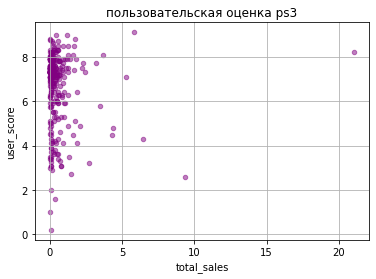

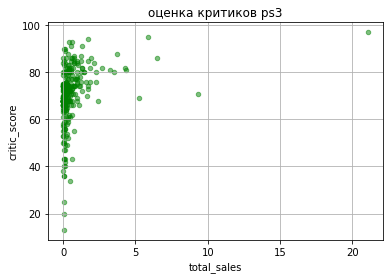

Таблица корреляции данных critic_score, user_score и total_sales:

                  critic_score  user_score  total_sales
critic_score          1.00        0.35         0.29
user_score            0.35        1.00        -0.06
total_sales           0.29       -0.06         1.00


In [44]:
score_corr('ps3')

Сильной зависимости объемов продаж игр на площадке `PS3` от оценок не наблюдается, в обоих случаях чуть чуть больше выражена чем на площадке `X360`. 
- у `user_score` почти отсуствующая обратная зависимость
- у `critic_score` она слабая

Соотнесем с показателями на платформе `PS4`

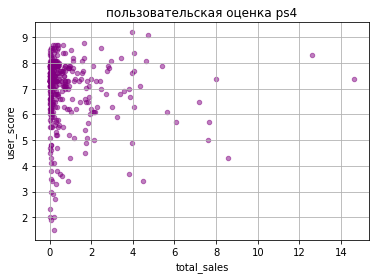

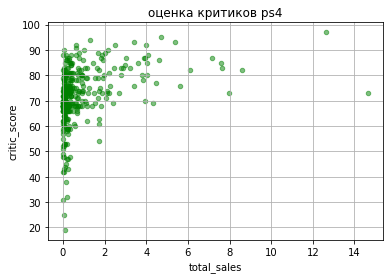

Таблица корреляции данных critic_score, user_score и total_sales:

                  critic_score  user_score  total_sales
critic_score          1.00        0.50         0.35
user_score            0.50        1.00        -0.05
total_sales           0.35       -0.05         1.00


In [45]:
score_corr('ps4')

Сильной зависимости объемов продаж игр на площадке `PS4` от оценок не наблюдается, в случае с оценкой критиков она практически такая же как на площадке `X360`, но у оценки пользователей наблюдается обратная зависимость. 
- у `user_score` почти отсуствующая обратная зависимость
- у `critic_score` она слабая

Соотнесем с показателями на платформе `3DS`

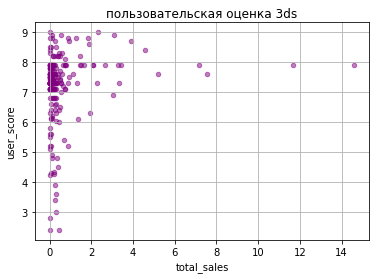

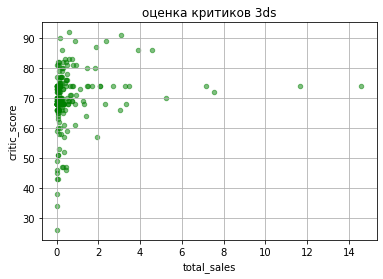

Таблица корреляции данных critic_score, user_score и total_sales:

                  critic_score  user_score  total_sales
critic_score          1.00        0.51         0.17
user_score            0.51        1.00         0.14
total_sales           0.17        0.14         1.00


In [46]:
score_corr('3ds')

Сильной зависимости объемов продаж игр на площадке `3DS` от оценок не наблюдается, в обоих случаях очень слабые  зависимости, что не много отличается от показателя на площадке `X360`. 
- у `user_score` она очень слабая
- у `critic_score` она очень слабая

Соотнесем с показателями на платформе `Wii`

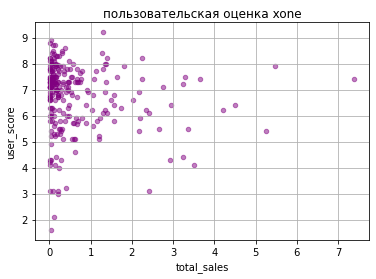

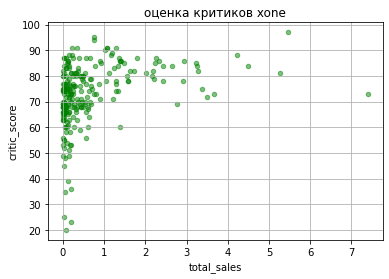

Таблица корреляции данных critic_score, user_score и total_sales:

                  critic_score  user_score  total_sales
critic_score          1.00        0.41         0.34
user_score            0.41        1.00        -0.09
total_sales           0.34       -0.09         1.00


In [47]:
score_corr('xone')

Сильной зависимости объемов продаж игр на площадке `XOne` от оценок не наблюдается, в обоих случаях наблюдаются характерные зависимости, как и на площадке X360.
- у `user_score` почти отсуствующая обратная зависимость
- у `critic_score` она слабая

#### Анализ распределение игр по жанрам

Рассмотрим сколько видов жанра в датасете и их структуру, а так же объем продаж в каждом жанре и их долю

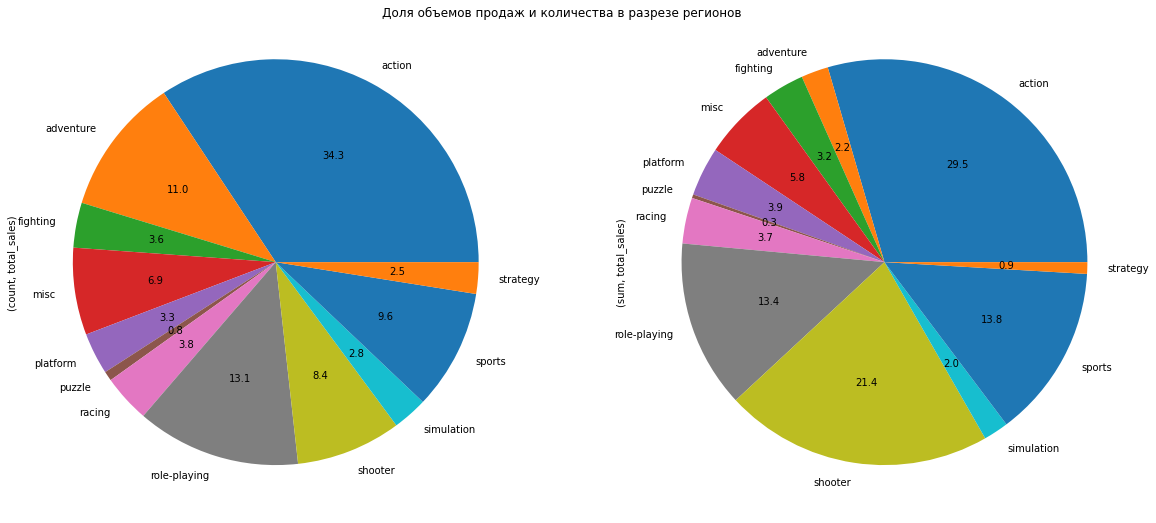

Количество игр в каждом жанре (шт.):


genre,action,role-playing,adventure,sports,shooter,misc,racing,fighting,platform,simulation,strategy,puzzle
name,766,292,245,214,187,155,85,80,74,62,56,17



Объем продаж в каждом жанре (млн.):


genre,action,shooter,sports,role-playing,misc,platform,racing,fighting,adventure,simulation,strategy,puzzle
total_sales,321.87,232.98,150.65,145.89,62.82,42.63,39.89,35.31,23.64,21.76,10.08,3.17


In [48]:
#график доли игр по жанрам
(df_actual
 .pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum'])
 .plot(subplots=True, 
       kind='pie', 
       figsize=(20, 20), 
       legend=False,
       autopct="%.1f"))

plt.suptitle(name_dict.get('share_number_genre'), y = 0.68, fontsize = 12)

plt.show()

#таблицы с данными
print("Количество игр в каждом жанре (шт.):")
display((df_actual
 .pivot_table(columns='genre', values='name', aggfunc='count')
 .sort_values(by='name', axis=1, ascending=False)))

print()
print("Объем продаж в каждом жанре (млн.):")
display((df_actual
 .pivot_table(columns='genre', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', axis=1, ascending=False)))

1. Самое большое количество игр в жанрах `Action, Role-playing, Adventure, Sports` 
2. Самое маленькое количество игр в жанрах `Simulation, Puzzle, Strategy` 
3. Самые большие объемы продаж в жанрах `Action, Shooter, Sports`
4. Самые маленькие объемы продаж в жанрах `Simulation, Strategy, Puzzle`

Самые высокие по выручке жанры `Action`, `Sports`, `Shooter`, выделяются и как самые большие по количеству игр. Жанр `Shooter` имеет среднии по доли показатели количества игр, но показывает большие объемы продаж. Так же обращает на себя внимание `Adventure`, у которой одни из самых низких объемов продаж, но по количеству игр входит в число одних из самых больших. `Strategy, Puzzle` имеют изкие показатели как по количеству игр так и по объему продаж.

In [49]:
#Основные статистические показатели по объемам продаж в разрезе жанров
display(df_actual.pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum').describe())

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
count,402.00,179.00,47.00,102.00,37.00,12.00,36.00,207.00,76.00,48.00,75.00,42.00
mean,0.80,0.13,0.75,0.62,1.15,0.26,1.11,0.70,3.07,0.45,2.01,0.24
std,3.18,0.37,1.94,2.53,1.36,0.37,1.55,1.82,5.36,1.00,3.76,0.40
min,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01
25%,0.03,0.02,0.06,0.03,0.19,0.03,0.10,0.06,0.14,0.03,0.17,0.03
50%,0.11,0.03,0.17,0.09,0.58,0.09,0.47,0.16,1.19,0.05,0.53,0.08
75%,0.41,0.07,0.52,0.28,1.73,0.29,1.55,0.48,3.55,0.37,1.47,0.25
max,56.58,2.92,12.42,24.16,6.00,1.19,7.09,14.60,27.39,5.22,17.37,1.73


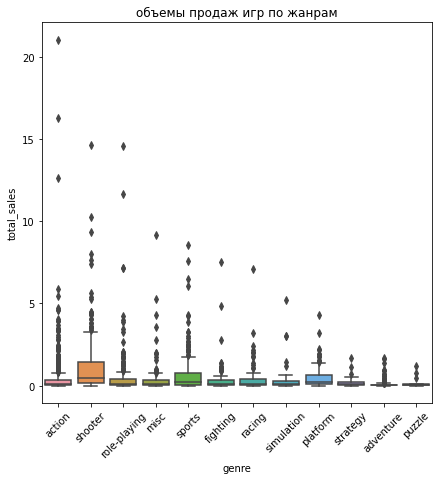

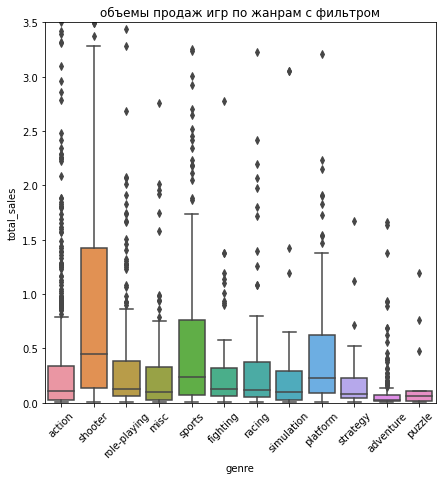

In [50]:
#отрисуем распределение общих продаж игр в разрезе жанров
create_boxplot(data=df_actual, 
               x='genre', 
               y='total_sales', 
               title_name=name_dict.get('genre_sales'),
               rot=45)

#т.к в данных присутвует большое количество выбросов с большим размахом в сторону больших продаж, "увеличим" маштаб
create_boxplot(df_actual, 
               'genre', 
               'total_sales', 
               name_dict.get('genre_sales_filter'),
               45,
               3.5)

- `Shooter` и `Sports` - имеет самый большие межквартильные размахи среди остальных жанров, и в жанре `Shooter`, показатели 1, 2 и 3 квартиля самые высокие. 
- `Adventure` и `Puzzle`- напротив имеет самые маленькие показатели межквартильного размаха, и в жанре `Adventure` самые низкие показатели 1, 2 и 3 квартиля. 
- `Platform` - обращают на себя внимание меньшим межквартильным размахом, и показателями 1, 2 и 3 квартиля, чем `Shooter` и `Sports`, но показывают большие показатели, чем у других жанров 

### Портрет пользователей в разрезе регионов представленные в выборке 

**Для начала рассмотрим как распределены продажи игр среди всех регионов выборки**

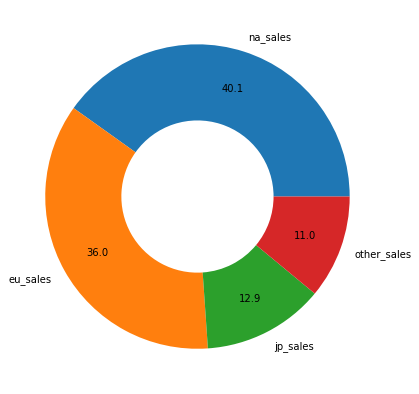

,na_sales,eu_sales,jp_sales,other_sales
total,437.71,392.23,140.78,119.97


In [51]:
#выводим доли на графике
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(df_actual.filter(items=['na_sales', 'eu_sales', 'jp_sales', 'other_sales']).sum(), 
       labels=df_actual.filter(items=['na_sales', 'eu_sales', 'jp_sales', 'other_sales']).sum().index,  
       wedgeprops=dict(width=0.5), 
       autopct="%.1f", 
       pctdistance=0.75)
fig.set_figure(40)
ax.set_title(name_dict.get('share__value_sales_region'))
plt.show();
#Выводим таблицу с долями
display(df_actual.
        filter(items=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
        .sum()
        .to_frame(name='total').T)

Доля региона `NA` самая значительная - `40.1%` или `437.71 млн.`, на Северную Америку и Европу приходится большая часть продажи игр.  
Доля прочих регионов `other_sales` меньше, чем у самой маленькой по объему региону `11.0%` `119.97 млн`

#### Популярные платформы в регионах NA, EU, JP

In [52]:
#Создадим необходимые срезы
df_na = df_actual.query('na_sales != 0') 
df_eu = df_actual.query('eu_sales != 0') 
df_jp = df_actual.query('jp_sales != 0') 

#функция для получения среза фильтрованных данных
def get_top5(data: pd.DataFrame, group_type: str, col_name: str):
    data_ = (data
             .groupby(group_type)
             .sum()
             .sort_values(by=col_name, ascending=False)
             .reset_index())
    
    data_.loc[len(data_.index)] = ['others', data_[col_name][5:].sum()] 
    
    return data_.sort_values(by=col_name, ascending=False)[:6]


In [53]:
#создадим 3 графика pie
def creat_pie_3(array_data: list, col: str, title_name: str)-> None:
    
    list_col = ['na_sales', 'eu_sales', 'jp_sales']
    
    fig, axes = plt.subplots(1, 3)
    
    for i in range(len(array_data)):
        axes[i].pie(array_data[i][list_col[i]], labels=array_data[i][col], autopct="%.1f", textprops={'fontsize': 14})
        
    #Заголовок всех 3 диаграмм:
    fig.suptitle(title_name, y = 0.68, fontsize = 17)
    
    #Заголовки каждого круга:
    list_title = ['North America', 'Europe', 'Japan']
    
    for v in range(len(list_title)):
        axes[v].set_title(list_title[v],fontsize = 15)
 
    fig.set_figheight(20)
    fig.set_figwidth(20)
    
    plt.show()

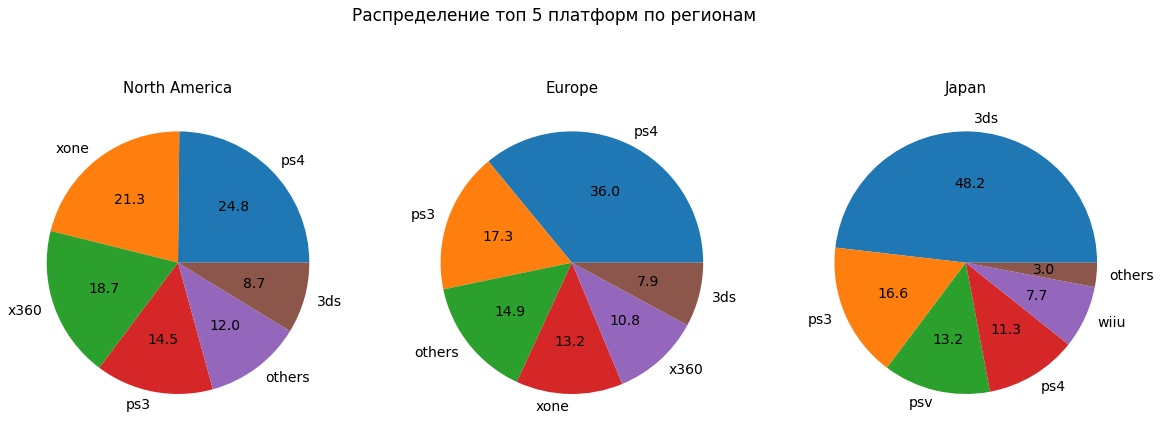

'Объем продаж на платформах в разрезе регионов:'

,platform,na_sales,eu_sales,jp_sales
0,ps4,108.74,141.09,15.96
1,xone,93.12,51.59,-
2,x360,81.66,42.52,-
3,ps3,63.50,67.81,23.35
4,others,52.49,58.26,4.19
5,3ds,38.20,30.96,67.81
6,psv,-,-,18.59
7,wiiu,-,-,10.88


In [54]:
region_platform = [get_top5(df_na[['platform', 'na_sales']], 'platform', 'na_sales'),
                   get_top5(df_eu[['platform', 'eu_sales']], 'platform', 'eu_sales'),
                   get_top5(df_jp[['platform', 'jp_sales']], 'platform', 'jp_sales')]

#Выводим графики
creat_pie_3(array_data=region_platform, col='platform', title_name=name_dict.get('share_top_5_platform'))

#Выводим таблицу 
display('Объем продаж на платформах в разрезе регионов:', 
        region_platform[0].merge(region_platform[1], how="outer").merge(region_platform[2], how="outer").fillna('-'))

В регионе `NA` самые популярные платформы `PS4 - 108.74 млн., XOne - 93.12 млн., X360 - 81.66 млн., PS3 - 63.50 млн., 3DS - 38.2 млн.`, на них приходится основная доля продаж в регионе. Самая больша доля продаж игр у `PS4 - 24.8%` у `XOne - 21.3%` и , у `X360 - 18.7%`. 

В регионе `EU` объемы продаж меньше, чем в `NA`, и самые популярные платформы `PS4 - 141.09 млн., PS3 - 67.81 млн, XOne - 51.59 млн., X360 - 42.52 млн., 3DS - 30.96 млн.,`  на них приходится основная доля продаж в регионе. Самая больша доля продаж игр у `PS4 - 36.0% и у PS3 - 17.3%, у XOne - 13.2%, X360 - 10.8%`. Надо отменить что в Европе больше предпочитают линейку `PS`, чем `XB`

В регионе `JP` объемы продаж меньше, чем в `NA`, и чем `EU`, и самые популярные платформы отличаются от  `NA` и `EU` - `3DS - 67.81 млн., PS3 - 23.35 млн., PSV - 18.59 млн., PS4 - 15.96 млн., Wiiu - 10.88 млн.`, на них приходится основная доля продаж в регионе. Самая больша доля продаж игр у `3DS - 48.2% (подавляющая доля) и у PS3 - 16.6%, у PSV - 13.2%`. Надо отменить что в Японии больше предпочитают `3DS`, чем линейки `PS`, а линейка `XB` отсутвует в топ 5 платформ.

#### Расмотрим популярные жанры игр в регионах NA, EU, JP

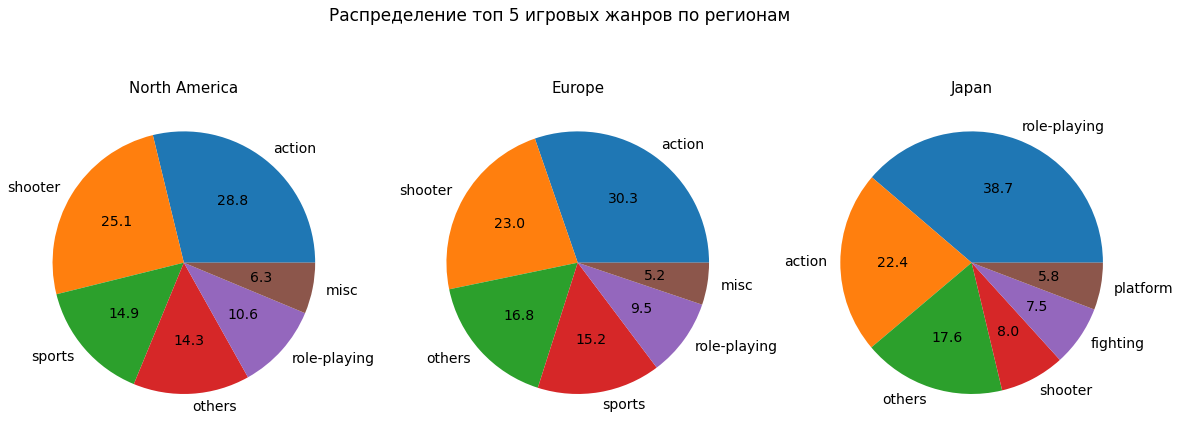

'Объем продаж в игровых жанрах в разрезе регионов:'

,genre,na_sales,eu_sales,jp_sales
0,action,126.05,114.70,18.21
1,shooter,109.74,86.94,6.49
2,sports,65.27,57.51,-
3,others,62.76,63.72,14.26
4,role-playing,46.40,36.15,31.44
5,misc,27.49,19.62,-
6,fighting,-,-,6.06
7,platform,-,-,4.71


In [55]:
region_genre = [get_top5(df_na[['genre', 'na_sales']], 'genre', 'na_sales'),
                get_top5(df_na[['genre', 'eu_sales']], 'genre', 'eu_sales'),
                get_top5(df_na[['genre', 'jp_sales']], 'genre', 'jp_sales')]

#Выводим графики
creat_pie_3(array_data=region_genre, 
            col='genre', 
            title_name=name_dict.get('share_top_5_genre'))

#Выводим таблицу 
display('Объем продаж в игровых жанрах в разрезе регионов:', 
        region_genre[0].merge(region_genre[1], how="outer").merge(region_genre[2], how="outer").fillna('-'))

В регионе `NA` самые популярные жанры игр `Action - 126.05 млн, Shooter - 109.74 млн, Sports - 65.27 млн, Role-playing - 46.4 млн, Misc - 27.49 млн`, на эти жанры приходится основная доля продаж в регионе. Самая больша доля продаж игр в жанрах `Action - 28.8%` и `Shooter - 25.1%`, и `Sports - 14.9%`. 

В регионе `EU` самые популярные жанры игр `Action - 114.7 млн, Shooter - 86.94 млн, Sports - 57.51 млн, Role-Playing - 
36.15 млн, Misc - 19.62 млн`, на эти жанры приходится основная доля продаж в регионе. Самая больша доля продаж игр в жанрах `Action - 30.3%` и `Shooter - 23.0%`, и `Sports - 15.2%`. Предпочтение по жанрам в `EU` похожие на `NA`

В регионе `JP` самые популярные жанры игр `Role-Playing - 31.44 млн, Action - 18.21 млн, Shooter - 6.49 млн, Fighting - 6.06 млн, Platform - 4.41 млн`, на эти жанры приходится основная доля продаж в регионе. Самая больша доля продаж игр (очень значительная) в жанрах `Role-Playing - 38.7% и Action - 22.4%, и Shooter - 8.0%`. Предпочтение пользователей в Японии по жанрам сильно отличаются от Европы и Северной Америки, В Японии явно предпочитают `Role-Playing` в отличии от Америки и Европы у который `Shooter` на втором месте по поулярности.

**Рассмотрим влияние рейтинга ESRB на продажи в выбранных регионах**

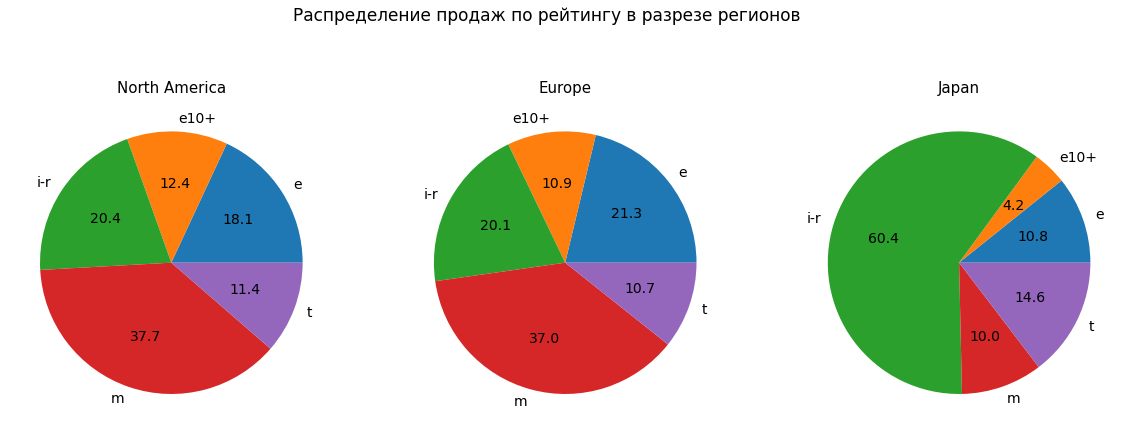

'Объем продаж в в рейтингах в разрезе регионов:'

,rating,na_sales,eu_sales,jp_sales
0,e,79.05,83.36,15.14
1,e10+,54.24,42.69,5.89
2,i-r,89.42,78.91,85.05
3,m,165.21,145.32,14.11
4,t,49.79,41.95,20.59


In [56]:
region_rating = (df_actual[['name', 'rating', 'na_sales', 'eu_sales', 'jp_sales']]
                 .groupby('rating')
                 .sum()
                 .reset_index())

region = [region_rating[['rating', 'na_sales']], region_rating[['rating', 'eu_sales']], region_rating[['rating', 'jp_sales']]]

#Выводим графики 
creat_pie_3(array_data=region, 
            col='rating', 
            title_name=name_dict.get('share_top_rating'))

#Выводим таблицу 
display('Объем продаж в в рейтингах в разрезе регионов:', region_rating)

Рейтинг игр по ESRB в регионе **NA** оказывает влияние следующим образом, при достаточно низкой доли продаж игр без рейтинга `I-R 20,4%`, игры с рейтингом `M` и `E` иметю совокупный удельный вес более `50%`

Рейтинг игр по ESRB в регионе **EU** имеет похожую на **NA** распределение продаж по рейтингам по первым 2 рейтингам **M** и **E**, в том числе не очень большей доли без рейтинга `I-R 20,1%`, что может говорить о одинаковом уровне влиянии рейтинга в Европе и в Северной Америки.

Рейтинг игр по ESRB в регионе **JP** оказывает не значительное влияние на объем продаж игр и сильно отличается долей и распределением продаж игр в разрезе рейтингов от двух вышерасмотренных регионах. Доля игр без рейтинга `I-R 60,4%`, далее идет рейтинг `T 14,6%`, так же обращает на себя внимание не высокая доля `M всего 10.0%`. 

### Проверка основных гипотез проекта

**Первая гипотеза**: Средние пользовательские рейтинги платформ `XOne` и `PC` одинаковые.  
Для начала посмотрим на распределение пользовательских оценок и основные статистические показатели на платформах `Xbox One` и `PC`.

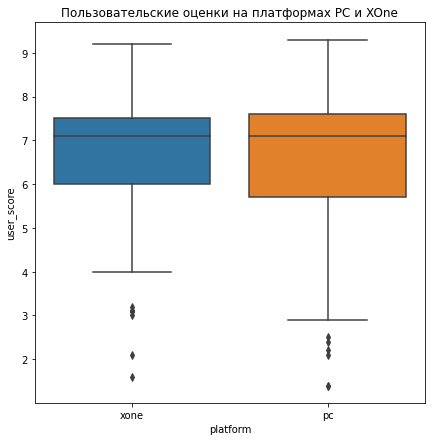

platform,pc,xone
count,189.00,247.00
mean,6.45,6.73
std,1.65,1.29
min,1.40,1.60
25%,5.70,6.00
50%,7.10,7.10
75%,7.60,7.50
max,9.30,9.20


In [57]:
#выводим график
create_boxplot(data=df_actual.query('platform in ["xone", "pc"]'),
               x='platform', 
               y='user_score', 
               title_name=name_dict.get('user_score_PC_XOne'))
# выводим таблицу
display(
    df_actual
    .query('platform in ["xone", "pc"]')
    .pivot_table(index='name', columns='platform', values='user_score')
    .describe()
)

Кроме 2 квартиля, остальные показатели отличаются, в диапазоне от `0.10 до 0.30`, провери гипотезу с использование `ttest-a`, сформулируем нулевую `H0` и альтернативную `H1` гипотезы:
- `H0` - Средние пользовательские рейтинги платформ `XOne` и `PC` равны.
- `H1` - Средние пользовательские рейтинги платформ `XOne` и `PC` не равны.

`H0` и `H1` исходя из первой гипотезы, где при большой вероятности равенства двух выборок, мы не сможем отвергнуть нулевую гипотезу, и утверждать, что средние пользовательские рейтинги платформ `XOne` и `PC` не равны. Т.к размер выборок различный по размеру будем использовать настройку `equal_var=False в ttest-е`

Критический уровень статистической значимости `alpha` примем за `0.05`.

In [58]:
games_xone = df_actual.loc[(df_actual['platform'] == 'xone') &
                              (~df_actual['user_score'].isna()), 
                              'user_score']
games_pc = df_actual.loc[(df_actual['platform'] == 'pc') &
                              (~df_actual['user_score'].isna()), 
                              'user_score']
#зададим критический уровень статистической значимости
alpha = .05
 
results = st.ttest_ind(
    games_xone,
    games_pc,
)
 
print('p-значение:', results.pvalue)
 
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Cредний пользовательский рейтинг платформы Xbox One -', games_xone.mean().round(2))
print('Cредний пользовательский рейтинг платформы PC -', games_pc.mean().round(2))

p-значение: 0.05139254983546035
Не получилось отвергнуть нулевую гипотезу

Cредний пользовательский рейтинг платформы Xbox One - 6.73
Cредний пользовательский рейтинг платформы PC - 6.45


In [59]:
games_xone

99      7.40
165     7.90
179     5.40
242     6.40
270     6.20
        ... 
16630   8.20
16643   6.60
16645   7.70
16660   6.70
16672   7.80
Name: user_score, Length: 247, dtype: float32

In [60]:
results = st.ttest_ind(
    df_actual.query('platform == "xone"')['user_score'],
    df_actual.query('platform == "pc"')['user_score'],
    equal_var=False
)
alpha = .05
print('Значение p-value:', results.pvalue)

print('Отвергаем нулевую гипотезу' if results.pvalue < alpha else 'Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 0.05950386043747883
Не получилось отвергнуть нулевую гипотезу


Значение `p-value` равно почти `6%` вероятности случайно получить такое или большее различие, не смотря на то, что среднии оценки в регионах разные. Это слишком большая вероятность, чтобы делать однозначный вывод *о значимом различии между средними пользовательскими рейтингами платформ `XOne` и `PC`.*

**Вторая гипотеза** Средние пользовательские рейтинги жанров `Action` и `Sports` разные.  

Для начала посмотрим на распределение пользовательских оценок и основные статистические показатели в жанрах `Action` и `Sports`

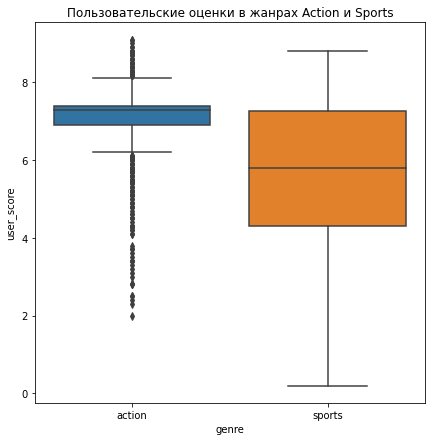

genre,action,sports
count,402.00,75.00
mean,7.14,5.92
std,0.90,1.54
min,2.30,2.38
25%,7.30,4.91
50%,7.30,6.10
75%,7.30,7.40
max,9.10,8.40


In [61]:
#выводим график
create_boxplot(data=df_actual.query('genre in ["action", "sports"]'),
               x='genre', 
               y='user_score', 
               title_name=name_dict.get('user_score_action_sports'))
#выводим таблицу
display(
    df_actual
    .query('genre in ["action", "sports"]')
    .pivot_table(index='name', columns='genre', values='user_score')
    .describe()
)

В выбранных жанрах медиана и 3 квартиль имеют одинаковые значения, остальные показатели отличаются, в диапазоне от 0.10 до 0.40, провери гипотезу с использование ttest-a, сформулируем нулевую H0 и альтернативную H1 гипотезы:

- H0 - Средние пользовательские рейтинги жанров `Action` и `Sports` равны.  
- H1 - Средние пользовательские рейтинги жанров `Action` и `Sports` не равны.

H0 и H1 исходя из второй гипотезы, где при большой вероятности равентсве двух выборок, мы не сможем принять альтернативную гипотезу, и утверждать, что средние пользовательские рейтинги жанров `Action` и `Sports` разные. Т.к. размер выборки различный по размеру будем использовать настройку `equal_var=False в ttest-е`

Критический уровень статистической значимости `alpha` примем за `0.05`.

In [62]:
results = st.ttest_ind(
    df_actual.query('genre == "action"')['user_score'],
    df_actual.query('genre == "sports"')['user_score'],
    equal_var=False
)
alpha = .05
print('Значение p-value:', results.pvalue)

print('Отвергаем нулевую гипотезу' if results.pvalue < alpha else 'Не получилось отвергнуть нулевую гипотезу')

Значение p-value: 1.9966723042422301e-25
Отвергаем нулевую гипотезу


Значение `p-value` на много меньше критического уровеня статистической значимости, соовтественно мы отвергаем нулевую гипотезу о равенстве двух выборок, и принимаем тот факт, среднии оценки в жанрах `Action` и `Sports` разные. 

### Общий вывод

Данное исследование направленно на выявления закономерностей определяющие успешность игры, с целью определения потеницально прибыльных игр на определенных платформах, для определения популярных игр и планирования рекламных кампаний на будущий год. 

Входные данные - выборка из 16715 строк, куда входит перечень игр за период с 1985 по 2016 год, и основной информацие об регионе распостранения, ее рейтингах и оценках и объема продаж размещенных в 10 колонках.

**Основные гипотезы**  
- Гипотеза 1. Средние пользовательские рейтинги платформ `XOne и PC` одинаковые.
- Гипотеза 2. Средние пользовательские рейтинги жанров `"Action" и "Sports"` разные.

**Атуальность данных**  
Входе первичного анализа выборки было выявленно то, что пик выпуска количества и пик продаж пришелся на `2008 год`, после чего на протяжении последних `8 лет` идет тренд снижения и количества игр и объемов их продаж. 

Игры выпускаются и продаются с привязкой к конкретным платформам и средний срок жизни (создание - популярности - исчезновение) этих платформ `7 лет`, с тенденцией серьезного уменьшения объемов продаж в 4 декаде своего существования.

В жизненом цикле платформы показывают низкие объемы продаж, и мода на игры проходит довольно быстро 2-3 года, игровая индустрия очен динамичная в этом плане, поэтому оптимальный срок, при котором с большей вероятностью мы исключим игры с потухшем тренде последнии 3 года.

Наиболее популярные платформы и объемы игр в них в период с 2013 по 2016 год:

In [63]:
display(df_actual
        .pivot_table(columns='platform', values='total_sales', aggfunc='sum')
        .sort_values(by='total_sales', axis=1, ascending=False))

platform,ps4,ps3,xone,3ds,x360,wiiu,pc,psv,wii,psp,ds
total_sales,314.14,181.43,159.32,143.25,136.80,64.63,39.43,32.99,13.66,3.50,1.54


Здесь важно отметить то, что в последнии годы тренд на перезапуск платформ с новыми функциональными возможностями (`PS2 -> PS3 -> PS4 или XB -> X360 -> XOne`), поэтому анализируя данные необходимо учитывать этот факт, потому что популярность игры, на прошлой игровой платформе имеет высокую вероятность популярности и на следующей платформе, но эту гипотезу в рамках данного проекта и тз, проверить нет возможности.   

Основной объем продаж игр практически на всех платформах находится в пределах `0,5 - 0,78 млн`. Но практически в каждой платформе присутвуюет большое количество "выбросов" (в текущем проекте это игры, которые резко отличаются по объемам продаж от соновной массы игр), стоит обратить на эти игры пристально внимание, большие объемы продаж игр обусловленны высоким спросом на них, что скорее всего обусловленно их популярностью (пользователи не будут покупать не популярные игры).

**Зависимость объемов продаж от оценок критиков и пользователей**  

Входе анализа были провернны самые популярные платформы на предмет зависимости объемов продаж и оценко критиков (`critic_score`) и пользователей (`user_score`), и в ходе анализа обнаружено, что на всех платформах примерно идетничное влияение оценок критиков и пользователей, которое характеризуется:
- оценок критиков - очень слабая, часто обратная зависимость
- оценка пользователей - практически отсутвует зависимость

Слабое влияние оценков критиков, в отличии практически отсутвующего влияния от оценок поользователей, скорее всего связанно с тем, что критики дают оценку перед массовыми продажами игр, либо с тем, что потеницальные пользователи доверют професиональному суждению критиков.

**Популярные игровые жанры**

По количеству игр: `Action, Role-playing, Adventure, Sports, Shooter` 	
Объемам продаж: `Action, Shooter, Sports, Role-playing, Misc`  
- `Shooter` выделяется объемами продаж, но занимает последнее место в топ 5 по количеству игр, это а так же большие значение межквартильного размаха говорит, о том, что игры в этом жанре продаются в больших объемах, чем игры в других жанрах лидерах.
- `Adventure`, наоборот показал обратную динамику.

`Action, Shooter, Sports` имеют более половины от всего объема продаж, соответсвенно потенциально эти жанры можно считать наиболее популярными.
`Adventure, Strategy, Puzzle` имеют самый маленькие объемы продаж, с данными жанрами надо быть аккуратными в выборе стратегии, особенно с жанром `Adventure`

**Портрет пользователей основных регионов продаж игр**
- В Северной Америке (NA) самые занчительные объемы продаж - 40.1% или 437.71 млн., 
- В Европе(EU) - 36.0% или 392.23 млн. 
- В Японии 12,9% или 140.78 млн
- В прочих странах - 11.0% или 119.97 млн.

Пользователи из основного региона по объему продаж `NA` предпочитают:
- Платформы: `X360, PS3, Wii` (доля рынка по мере убывания)
- Игровый жанры: `Action - 126.05 млн, Shooter - 109.74 млн, Sports - 65.27 млн` (доля рынка по мере убывания)
- Рейтинг ESRB: Имеет достаточнок влияние, большой удельный пользователей в категории `взрослые` и `для всех`

Пользователи из второго региона по объему продаж `EU` предпочитают:
- Платформы: `PS4 - 108.74 млн., XOne - 93.12 млн., X360 - 81.66 млн.` (доля рынка по мере убывания)
- Игровый жанры: `Action - 114.7 млн, Shooter - 86.94 млн, Sports - 57.51 млн`(доля рынка по мере убывания)
- Рейтинг ESRB: Имеет достаточнок влияние, большой удельный пользователей в категории `взрослые` и `для всех`

Пользователи из третьего региона по объему продаж `JP` предпочитают:
- Платформы: `3DS - 67.81 млн., PS3 - 23.35 млн., PSV - 18.59 млн.` (доля рынка по мере убывания)
- Игровый жанры: `Role-Playing - 31.44 млн, Action - 18.21 млн, Shooter - 6.49 млн`(доля рынка по мере убывания)
- Рейтинг ESRB: Не значительное влияние, большой удельный все пользователей в категории `для всех` и `подростки`.

Жанры `Action, Sports, Shooter` основные в `NA и EU`, распределение игр по жанрам примерно однаковое, за исключенеим того что в EU меньше игр с самыми маленькими объемами продаж. В `JP`. серьезное отличие по популярности платформ от остальных двух лидеров и явно выделяется жанр `Role-Playing` не только значительной долей на региональном рынке, но и значительными объемами продаж на фоне основных регионов продаж игр.

**Основные гипотезы проекта**

**Гипотеза 1**  

Ttest показал значение p-value почти 34% вероятности случайно получить такое или большее различие, не смотря на то, что средниие оценки в регионах разные. Это слишком большая вероятность, чтобы делать однозначный вывод о значимом различии между средними пользовательскими рейтингами платформ Xbox One и PC.

**Гипотеза 2**  

Имеет очень низкую вероятность получить одинаковые данные, т.к. значение p-value на много меньше критического уровеня статистической значимости, соовтественно мы отвергаем нулевую гипотезу о равенстве двух выборок, и принимаем тот факт, среднии оценки в жанрах Action и Sports, с очень большой вероятностью, разные.